In [1]:
import  tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import cv2 as cv
from collections import Counter
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sayus\miniconda3\envs\te\lib\site-packages\tensorflow\python\framework

In [2]:
import os

In [4]:
# x=np.load('Dataset/all_7/x_train.npy')
# y=np.load('Dataset/all_7/y_train.npy')
x=[]
y=[]
c=0
path='image_data/task7/after_augmentation'
for image in os.listdir(os.path.join(path, 'no_damage')):
    img=cv.imread(os.path.join(path,'no_damage', image),1)
    x.append(img)
    y.append(0)
    c=c+1
print("complete :", c)
c=0
for image in os.listdir(os.path.join(path, 'flexural')):
    img=cv.imread(os.path.join(path,'flexural', image),1)
    x.append(img)
    y.append(1)
    c=c+1
print("complete :", c)
c=0
for image in os.listdir(os.path.join(path, 'shear')):
    img=cv.imread(os.path.join(path,'shear', image),1)
    x.append(img)
    y.append(2)
    c=c+1
print("complete :", c)
c=0
for image in os.listdir(os.path.join(path, 'combined')):
    img=cv.imread(os.path.join(path,'combined', image),1)
    x.append(img)
    y.append(3)
    c=c+1
print("complete :", c)
x=np.array(x)
y=np.array(y)

complete : 1502
complete : 1648
complete : 1600
complete : 1572


In [5]:
x.shape, y.shape

((6322, 224, 224, 3), (6322,))

In [6]:
x = tf.keras.applications.vgg19.preprocess_input(x)
x

array([[[[ 9.0609970e+00, -2.7789993e+00, -5.6800003e+00],
         [ 1.5060997e+01,  3.2210007e+00,  3.1999969e-01],
         [ 1.6060997e+01,  3.2210007e+00, -1.6800003e+00],
         ...,
         [-5.7939003e+01, -6.2778999e+01, -5.8680000e+01],
         [-6.7939003e+01, -7.3778999e+01, -6.2680000e+01],
         [-3.5939003e+01, -4.1778999e+01, -2.9680000e+01]],

        [[ 7.0609970e+00, -4.7789993e+00, -7.6800003e+00],
         [ 1.3060997e+01,  1.2210007e+00, -1.6800003e+00],
         [ 1.3060997e+01,  2.2100067e-01, -4.6800003e+00],
         ...,
         [-5.5939003e+01, -6.0778999e+01, -5.6680000e+01],
         [-6.4939003e+01, -7.0778999e+01, -5.9680000e+01],
         [-3.6939003e+01, -4.2778999e+01, -3.0680000e+01]],

        [[ 7.0609970e+00, -4.7789993e+00, -7.6800003e+00],
         [ 1.0060997e+01, -1.7789993e+00, -4.6800003e+00],
         [ 1.1060997e+01, -1.7789993e+00, -6.6800003e+00],
         ...,
         [-5.3939003e+01, -5.8778999e+01, -5.4680000e+01],
         [

In [7]:
Counter(y)

Counter({0: 1502, 1: 1648, 2: 1600, 3: 1572})

In [8]:
for key, value in Counter(y).items():
    print(key, value/y.shape[0])

0 0.23758304334071495
1 0.26067700094906676
2 0.2530844669408415
3 0.2486554887693768


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


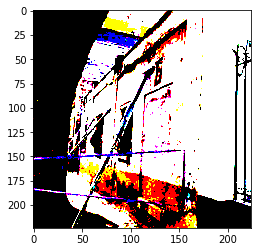

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


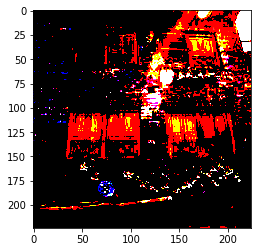

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


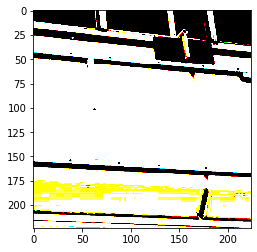

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


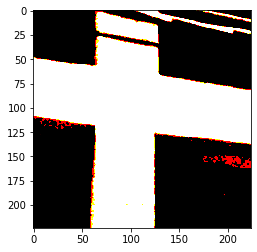

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


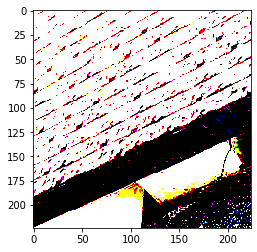

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


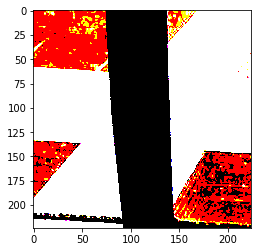

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


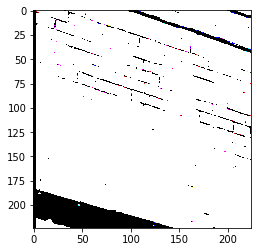

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


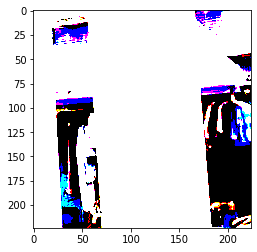

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


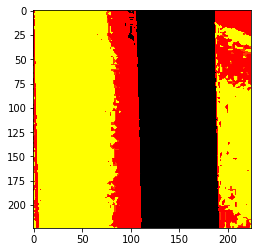

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


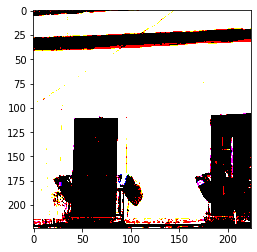

0


In [9]:
for i in range(10,20):
    plt.imshow(x[i])
    plt.show()
    print(y[i])

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10, shuffle=True)
x_train,x_val, y_train, y_val=train_test_split(x_train,y_train,test_size=0.11, shuffle=True) 
print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)
print("x_val :", x_val.shape)
print("y_val: ", y_val.shape)

x_train : (5063, 224, 224, 3)
y_train : (5063,)
x_test : (633, 224, 224, 3)
y_test : (633,)
x_val : (626, 224, 224, 3)
y_val:  (626,)


In [11]:
y_train=to_categorical(y_train, num_classes=4)
y_test=to_categorical(y_test, num_classes=4)
y_val=to_categorical(y_val, num_classes=4)

In [12]:
# x_train=x_train/255
# x_test=x_test/255
# x_val=x_val/255

In [13]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='densenet_weights_7.h5',
    monitor='val_acc',
    mode='max',
    verbose=1,
    save_best_only=True)

datagen=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.20,
    height_shift_range=0.20,
    horizontal_flip=True,
    zoom_range=0.15,
    vertical_flip=True,
    fill_mode='nearest')


In [14]:
image_height=224
image_width=224

In [15]:
from tensorflow.keras import backend as K

In [16]:
drop=0.3
#K.set_learning_phase(0)
densenet=tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None)
    #classes=4,
#densenet.trainable=False
# i=0
for layer in densenet.layers:
#     if i > 80:
#         break
    layer.trainable=False

    

#K.set_learning_phase(1)
x=densenet.output
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(drop)(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
p=tf.keras.layers.Dense(4,activation='softmax')(x)
model=tf.keras.Model(inputs=densenet.input, outputs=p)




print(model.summary())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
80142336/80134624 [==============================] - 8s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_con

In [17]:
#opt=tf.keras.optimizers.Adam(lr=0.000055)
initial_learning_rate = 0.0001
def scheduler(epoch, lr):
    if epoch == 0:
        return lr
    if epoch % 10 == 0:
        return lr * 0.1
    else:
        return lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
opt=tf.keras.optimizers.Adam(lr=initial_learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [18]:
history=model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=8, callbacks=[ lr_callback,model_checkpoint_callback], shuffle=True)

#history=model.fit_generator(datagen.flow(x_train, y_train, batch_size=8), steps_per_epoch=len(x_train)/8, epochs=30, validation_data=(x_val,y_val), callbacks=[lr_callback, model_checkpoint_callback], shuffle=True)#, class_weight=class_weights)

Train on 5063 samples, validate on 626 samples

Epoch 00001: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
Epoch 1/30
5056/5063 [============================>.] - ETA: 0s - loss: 1.2922 - acc: 0.4446
Epoch 00001: val_acc improved from -inf to 0.52077, saving model to densenet_weights_7.h5
5063/5063 [==============================] - 97s 19ms/sample - loss: 1.2920 - acc: 0.4442 - val_loss: 1.1974 - val_acc: 0.5208

Epoch 00002: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
Epoch 2/30
5056/5063 [============================>.] - ETA: 0s - loss: 0.7584 - acc: 0.6968
Epoch 00002: val_acc improved from 0.52077 to 0.53355, saving model to densenet_weights_7.h5
5063/5063 [==============================] - 91s 18ms/sample - loss: 0.7575 - acc: 0.6972 - val_loss: 1.1719 - val_acc: 0.5335

Epoch 00003: LearningRateScheduler reducing learning rate to 9.999999747378752e-05.
Epoch 3/30
5056/5063 [============================>.] - ETA: 0s - loss: 0.5

5063/5063 [==============================] - 116s 23ms/sample - loss: 0.0723 - acc: 0.9785 - val_loss: 1.3322 - val_acc: 0.6230

Epoch 00023: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
Epoch 23/30
5056/5063 [============================>.] - ETA: 0s - loss: 0.0752 - acc: 0.9792
Epoch 00023: val_acc did not improve from 0.62300
5063/5063 [==============================] - 110s 22ms/sample - loss: 0.0751 - acc: 0.9793 - val_loss: 1.3354 - val_acc: 0.6150

Epoch 00024: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
Epoch 24/30
5056/5063 [============================>.] - ETA: 0s - loss: 0.0661 - acc: 0.9812
Epoch 00024: val_acc improved from 0.62300 to 0.62460, saving model to densenet_weights_7.h5
5063/5063 [==============================] - 116s 23ms/sample - loss: 0.0662 - acc: 0.9812 - val_loss: 1.3237 - val_acc: 0.6246

Epoch 00025: LearningRateScheduler reducing learning rate to 9.999999974752427e-07.
Epoch 25/30
5056/5063 [=======

KeyboardInterrupt: 

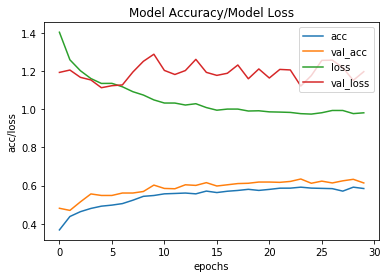

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy/Model Loss')
plt.ylabel('acc/loss')
plt.xlabel('epochs')
plt.legend(('acc','val_acc', 'loss', 'val_loss'), loc='upper right')
plt.savefig('test.jpg')
plt.show()

In [19]:
from tensorflow.keras.models import load_model

In [20]:
model=load_model('densenet_weights_7.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
prediction=model.predict(x_test)
evalution=model.evaluate(x_test, y_test)

633/633 [==============================] - 8s 12ms/sample - loss: 1.1776 - acc: 0.6272


In [22]:
np.argmax(prediction, axis=1)[10:20],np.argmax(y_test, axis=1)[10:20]

(array([2, 0, 3, 2, 3, 1, 2, 1, 1, 0], dtype=int64),
 array([0, 0, 0, 0, 3, 2, 1, 2, 1, 0], dtype=int64))

In [23]:
cf=confusion_matrix(np.argmax(y_test, axis=1),np.argmax(prediction,axis=1))
cf

array([[109,  13,  10,  15],
       [ 12, 130,  16,  12],
       [ 19,  32,  84,  24],
       [ 26,  25,  32,  74]], dtype=int64)

In [24]:
normalized_cf=[]
for x in cf:
    normalized_cf.append(x/sum(x))

In [25]:
normalized_cf=np.array(normalized_cf)
normalized_cf

array([[0.7414966 , 0.08843537, 0.06802721, 0.10204082],
       [0.07058824, 0.76470588, 0.09411765, 0.07058824],
       [0.11949686, 0.20125786, 0.52830189, 0.1509434 ],
       [0.1656051 , 0.15923567, 0.20382166, 0.47133758]])

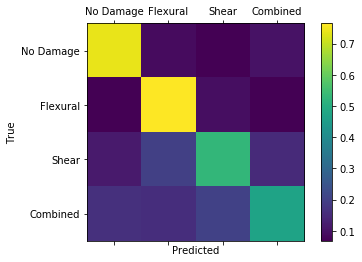

In [26]:
labels=['No Damage','Flexural','Shear','Combined']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(normalized_cf)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()